In [864]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

## Helper Functions - distiller-nf

In [865]:
def read_out_log(log):
    
    sample_name = "check"
    status = 0

    with open(log, errors='ignore') as fr:
        for line in fr:
            info = line.strip()
            if 'sample_name' in info:
                sample_name = info.split(": ")[1]
            if 'Ended: distiller-nf' in info:
                status = 1
            if 'failed' in info:
                status = 0

    return sample_name, status

In [866]:
def read_error_log(log):
    
    status = 1
    
    with open(log, errors='ignore') as fr:
        for line in fr:
            info = line.strip()
            if 'error' in info:
                status = 0
            if 'Error' in info:
                status = 0
    
    return status

## Check Logs - distiller-nf

In [740]:
# create a dataframe of log information
output_logs = glob.glob('results/revisions/distiller-nf/logs/job-*.out')
error_logs = glob.glob('results/revisions/distiller-nf/logs/job-*.error')
log_data = []   
for out_log in output_logs:
    sample_index = out_log.split('-')[2].split('.')[0]
    sample_name, status = read_out_log(out_log)
    error_log = [log for log in error_logs if log.split('-')[2].split('.')[0] == sample_index][0]
    error_status = read_error_log(error_log)
    log_data.append([sample_name, status, error_status, os.path.basename(out_log)])
log_df = pd.DataFrame(log_data)
log_df.columns = ['std_sample_name', 'out_status', 'error_status', 'log']
log_df = log_df.sort_values(by=["std_sample_name"], ascending=True)

KeyboardInterrupt: 

In [700]:
log_df = log_df.sort_values(by=["std_sample_name"], ascending=True).reset_index(drop=True)
#log_df = log_df.groupby(["std_sample_name"]).agg({"out_status" : 'sum'})
log_df

,std_sample_name,out_status,error_status,log
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,1,1,job-9000018.out
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0,1,job-9000705.out
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9002836.out
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9000706.out
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9000707.out
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,1,1,job-9000708.out
6,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9000709.out
7,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9000710.out
8,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,1,1,job-9000711.out
9,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1,1,job-9000712.out


## Identifying problem samples - distiller-nf

In [373]:
problems = (log_df.out_status != 1)
problems_df = log_df.loc[problems,:]
print('nubmer of problem samples:', len(problems_df))

nubmer of problem samples: 16


In [374]:
problems_df.loc[:, ['std_sample_name', 'out_status']]

,std_sample_name,out_status
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
11,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,0
13,CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
20,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
49,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
50,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
51,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,0
53,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,0
54,Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0
62,Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,0


In [264]:
samples = list(problems_df.loc[:, ['std_sample_name', 'out_status', 'log']]["std_sample_name"])
with open("results/samplesheets/hicpro/revisions.top_45.hicpro.samplesheet.unmerged.all_batches.without_header.tsv") as f:
    count = 1
    counts = []
    for line in f:
        if line.strip().split("\t")[0] in samples:
            counts.append(str(count))
            print(line.strip().split("\t")[0], count)
        count += 1
",".join(counts)

T47D-T0.GSE179666.Homo_Sapiens.PGR.b1 20
CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 60
CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2 68
CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 69
CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 74
Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 75
Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2 76
Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 77
Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 83
Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 84
Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 89
Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 95


'20,60,68,69,74,75,76,77,83,84,89,95'

## Helper Functions - Juicer

In [382]:
def read_out_log(log):
    
    status = 0

    with open(log, errors='ignore') as fr:
        for line in fr:
            info = line.strip()
            if '(-: Pipeline successfully completed (-:' in info:
                status = 1

    return(status)

In [383]:
def read_error_log(log):
    
    status = 1
    
    with open(log, errors='ignore') as fr:
        for line in fr:
            info = line.strip()
            if 'error' in info:
                status = 0
            if 'Error' in info:
                status = 0
    
    return(status)

## Check Logs - Juicer

In [384]:
# create a dataframe of log information
samples = glob.glob('results/revisions/juicer/work/*')
log_data = []   
for sample in samples:
    sample_name = sample.split("/")[4]
    try:
        logs = glob.glob(sample + "/debug/fincln1*.out")
        if len(logs) > 1:
            print("More logs than expected")
        out_status = read_out_log(logs[0])
    except:
        out_status = "error"
    log_data.append([sample_name, out_status])
log_df = pd.DataFrame(log_data)
#log_df.columns = ['sample_index', 'std_sample_name', 'read_length', 'job_id', 'out_status', 'error_status', 'log']
log_df.columns = ['std_sample_name', 'out_status']

In [385]:
log_df = log_df.sort_values(by=["std_sample_name"], ascending=True).reset_index(drop=True)
log_df

,std_sample_name,out_status
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,1
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
2,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
3,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,1
5,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
6,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
7,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,1
8,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1
9,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,1


## Identifying problem samples - Juicer

In [386]:
problems = (log_df.out_status != 1)
problems_df = log_df.loc[problems,:]
print('nubmer of problem samples:', len(problems_df))

nubmer of problem samples: 1


In [387]:
problems_df.loc[:, ['std_sample_name', 'out_status']]

,std_sample_name,out_status
98,deprecated,error


## Compile Statistics - Juicer

In [877]:
def read_log(log):
    data = []
    with open(log) as f:
        for line in f:
            info = int(line.strip().split(": ")[1])
            if "Total Pairs" in line:
                data.append(info)
            if "Cis Pairs" in line:
                data.append(info)
            if "Cis Short-Range Pairs" in line:
                data.append(info)
            if "Cis Long-Range Pairs" in line:
                data.append(info)
            if "Trans Pairs" in line:
                data.append(info)
    return data  

In [878]:
samples = glob.glob('results/revisions/juicer/work/*/aligned/filtered_stats_updated.txt')
data = []   
for sample in samples:
    sample_name = sample.split("/")[4]
    seq_data = read_log(sample)
    data.append([sample_name] + seq_data)
juicer = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
juicer.columns = ['sample_name', 'total_unique', 'inter', 'short_range_<=20kb', 'long_range_>20kb', 'intra']

In [879]:
juicer

,sample_name,total_unique,inter,short_range_<=20kb,long_range_>20kb,intra
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,222948214,204701383,114682657,90018726,18246831
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,15145687,10893111,3588654,7304457,4252576
2,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,11798669,8758730,2732889,6025841,3039939
3,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,12779492,9326754,2682313,6644441,3452738
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,10962083,8038012,2387067,5650945,2924071
5,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,16756327,12343815,4042773,8301042,4412512
6,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,10480536,7499916,1867284,5632632,2980620
7,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,16993248,12642619,3800796,8841823,4350629
8,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,19600589,14210794,4000399,10210395,5389795
9,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,11470958,8502870,2689937,5812933,2968088


In [880]:
def get_parse_sample_name(sample):
    if "phs" in sample:
        pattern = r"_(17[0-9]{2}|18[0-8][0-9]|1899)(-RH-1)?\."
        sample = re.sub(pattern, "_All-Donors.", sample)
    return sample[:-3]

In [881]:
juicer["parse_sample_name"] = juicer.apply(lambda x : get_parse_sample_name(x[0]), axis = 1)

In [882]:
juicer = juicer.groupby(['parse_sample_name'], as_index=False).agg({
    'sample_name' : list,
    'total_unique': 'sum',
    'inter': 'sum',
    'short_range_<=20kb': 'sum',
    'long_range_>20kb': 'sum',
    'intra': 'sum'
})

juicer["std_sample_name"] = juicer.apply(lambda x : x[0] + ".b1" if len(x[1]) == 1 and "All-Donors" not in x[0] else x[0] + ".biorep_merged", axis = 1)
juicer = juicer[["std_sample_name", 'total_unique', 'inter', 'short_range_<=20kb', 'long_range_>20kb', 'intra']]
juicer.columns = ["std_sample_name", "Valid Pairs Juicer", "Cis Interaction Juicer", "Cis Short-Range (<=20kb) Juicer", "Cis Long-Range (>20kb) Juicer", "Trans Interaction Juicer"]

In [883]:
juicer

,std_sample_name,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,222948214,204701383,114682657,90018726,18246831
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,125987589,92216621,27792112,64424509,33770968
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,83739386,61478741,19217193,42261548,22260645
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,150865278,138652822,90356123,48296699,12212456
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,18296055,17538556,13152471,4386085,757499
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,149816322,144919594,97901894,47017700,4896728
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,69154870,65130481,48795441,16335040,4024389
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,77512732,65016729,18681141,46335588,12496003
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,72327262,62969551,17827964,45141587,9357711
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,85187694,75559645,23505251,52054394,9628049


In [750]:
df.to_excel("results/revisions/tables/juicer_stats_08.28.24.xlsx")

## Compile Statistics - distiller-nf

In [867]:
def read_log(log):
    data = []
    with open(log) as f:
        for line in f:
            info = int(line.strip().split(": ")[1])
            if "Total Pairs" in line:
                data.append(info)
            if "Cis Pairs" in line:
                data.append(info)
            if "Cis Short-Range Pairs" in line:
                data.append(info)
            if "Cis Long-Range Pairs" in line:
                data.append(info)
            if "Trans Pairs" in line:
                data.append(info)
    return data  

In [868]:
samples = glob.glob('results/revisions/distiller-nf/work/*/results/pairs_library/filtered_stats_UU_UR.txt')
data = []   
for sample in samples:
    sample_name = sample.split("/")[4]
    seq_data = read_log(sample)
    data.append([sample_name] + seq_data)
distiller = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
distiller.columns = ['sample_name', 'total_unique', 'inter', 'short_range_<=20kb', 'long_range_>20kb', 'intra']

In [869]:
distiller

,sample_name,total_unique,inter,short_range_<=20kb,long_range_>20kb,intra
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,208411870,190776756,103208347,87568409,17635114
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,15551889,11223727,3790523,7433204,4328162
2,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,12205659,9088959,2911507,6177452,3116700
3,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,13239488,9695476,2876397,6819079,3544012
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,11349257,8344063,2537987,5806076,3005194
5,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,17141529,12662102,4234926,8427176,4479427
6,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,10848292,7788252,2008422,5779830,3060040
7,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,17522190,13070884,4024638,9046246,4451306
8,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,20050238,14577933,4214470,10363463,5472305
9,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,11819152,8784271,2842793,5941478,3034881


In [870]:
distiller["parse_sample_name"] = distiller.apply(lambda x : get_parse_sample_name(x[0]), axis = 1)

In [871]:
distiller = distiller.groupby(['parse_sample_name'], as_index=False).agg({
    'sample_name' : list,
    'total_unique': 'sum',
    'inter': 'sum',
    'short_range_<=20kb': 'sum',
    'long_range_>20kb': 'sum',
    'intra': 'sum'
})

distiller["std_sample_name"] = distiller.apply(lambda x : x[0] + ".b1" if len(x[1]) == 1 else x[0] + ".biorep_merged", axis = 1)
distiller = distiller[["std_sample_name", 'total_unique', 'inter', 'short_range_<=20kb', 'long_range_>20kb', 'intra']]
distiller.columns = ["std_sample_name", "Valid Pairs distiller-nf", "Cis Interaction distiller-nf", "Cis Short-Range (<=20kb) distiller-nf", "Cis Long-Range (>20kb) distiller-nf", "Trans Interaction distiller-nf"]

In [872]:
distiller

,std_sample_name,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,208411870,190776756,103208347,87568409,17635114
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,129727694,95235667,29441663,65794004,34492027
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,86150465,63427096,20295153,43131943,22723369
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,199826141,187577230,139106205,48471025,12248911
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,23838780,23074468,18652920,4421548,764312
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,195138919,190210896,142896481,47314415,4928023
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,31865422,31565515,30336640,1228875,299907
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,77993943,65493367,19140971,46352396,12500576
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,72863292,63500621,18335692,45164929,9362671
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,92457212,82831662,30772631,52059031,9625550


In [873]:
distiller.to_excel("results/revisions/tables/distiller_stats_UU_UR_09.04.24.xlsx")

## Compile Statistics - HiC-Pro

In [874]:
revision_samples = list(pd.read_csv("results/samplesheets/hicpro/revisions.top_45.hicpro.samplesheet.all.without_header.tsv", sep = "\t", header = None)[0])
all_samples = pd.concat([pd.read_csv("results/tables/update_08.28.2024/tsv/hg38.unmerged_hicpro.08_28_24.tsv", sep = "\t"),
                         pd.read_csv("results/tables/update_08.28.2024/tsv/hg38.merged_hicpro.08_28_24.tsv", sep = "\t"),
                         pd.read_csv("results/tables/update_08.28.2024/tsv/hg38.mega-merged_hicpro.08_28_24.tsv", sep = "\t")])

In [875]:
hicpro = all_samples.loc[all_samples["std_sample_name"].isin(revision_samples)].sort_values(by="std_sample_name").reset_index(drop=True)
hicpro = hicpro[["std_sample_name", "Total_pairs_processed", "valid_interaction_rmdup", "cis_interaction", "cis_shortRange", "cis_longRange", "trans_interaction"]]
hicpro.columns = ["std_sample_name", "Total Reads", "Valid Pairs HiC-Pro", "Cis Interaction HiC-Pro", "Cis Short-Range (<=20kb) HiC-Pro", "Cis Long-Range (>20kb) HiC-Pro", "Trans Interaction HiC-Pro"]

In [876]:
hicpro 

,std_sample_name,Total Reads,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,400231692,185311238,167276055,79171641,88104414,18035183
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,2125336641,128693337,90190543,20327505,69863038,38502794
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1287827257,84854513,59669373,14067670,45601703,25185140
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,88728377,77923897,34353165,43570732,10804480
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,76803406,10060062,9287138,5139456,4147682,772924
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,89449083,84656295,40669815,43986480,4792788
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,188721765,51760190,45076632,16817100,28259532,6683558
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,179126858,78137787,64870361,17147393,47722968,13267426
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,186278021,73195204,63117841,16175539,46942302,10077363
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,175142940,84033759,73496345,17974046,55522299,10537414


## Alignment Analysis

#### Create Master Dataframe

In [884]:
dat = hicpro.merge(juicer, on="std_sample_name").merge(distiller, on="std_sample_name")

In [885]:
dat

,std_sample_name,Total Reads,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,400231692,185311238,167276055,79171641,88104414,18035183,222948214,204701383,114682657,90018726,18246831,208411870,190776756,103208347,87568409,17635114
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,2125336641,128693337,90190543,20327505,69863038,38502794,125987589,92216621,27792112,64424509,33770968,129727694,95235667,29441663,65794004,34492027
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1287827257,84854513,59669373,14067670,45601703,25185140,83739386,61478741,19217193,42261548,22260645,86150465,63427096,20295153,43131943,22723369
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,88728377,77923897,34353165,43570732,10804480,150865278,138652822,90356123,48296699,12212456,199826141,187577230,139106205,48471025,12248911
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,76803406,10060062,9287138,5139456,4147682,772924,18296055,17538556,13152471,4386085,757499,23838780,23074468,18652920,4421548,764312
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,89449083,84656295,40669815,43986480,4792788,149816322,144919594,97901894,47017700,4896728,195138919,190210896,142896481,47314415,4928023
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,188721765,51760190,45076632,16817100,28259532,6683558,69154870,65130481,48795441,16335040,4024389,31865422,31565515,30336640,1228875,299907
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,179126858,78137787,64870361,17147393,47722968,13267426,77512732,65016729,18681141,46335588,12496003,77993943,65493367,19140971,46352396,12500576
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,186278021,73195204,63117841,16175539,46942302,10077363,72327262,62969551,17827964,45141587,9357711,72863292,63500621,18335692,45164929,9362671
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,175142940,84033759,73496345,17974046,55522299,10537414,85187694,75559645,23505251,52054394,9628049,92457212,82831662,30772631,52059031,9625550


In [886]:
dat["Valid Pairs Percent Change Juicer"] = dat.apply(lambda x : (float((x["Valid Pairs Juicer"] - x["Valid Pairs HiC-Pro"])) / float(x["Valid Pairs HiC-Pro"])) * 100, axis = 1)
dat["Cis Interaction Percent Change Juicer"] = dat.apply(lambda x : (float((x["Cis Interaction Juicer"] - x["Cis Interaction HiC-Pro"])) / float(x["Cis Interaction HiC-Pro"])) * 100, axis = 1)
dat["Cis Short-Range (<=20kb) Percent Change Juicer"] = dat.apply(lambda x : (float((x["Cis Short-Range (<=20kb) Juicer"] - x["Cis Short-Range (<=20kb) HiC-Pro"])) / float(x["Cis Short-Range (<=20kb) HiC-Pro"])) * 100, axis = 1)
dat["Cis Long-Range (>20kb) Percent Change Juicer"] = dat.apply(lambda x : (float((x["Cis Long-Range (>20kb) Juicer"] - x["Cis Long-Range (>20kb) HiC-Pro"])) / float(x["Cis Long-Range (>20kb) HiC-Pro"])) * 100, axis = 1)
dat["Trans Interaction Percent Change Juicer"] = dat.apply(lambda x : (float((x["Trans Interaction Juicer"] - x["Trans Interaction HiC-Pro"])) / float(x["Trans Interaction HiC-Pro"])) * 100, axis = 1)

dat["Valid Pairs Percent Change distiller-nf"] = dat.apply(lambda x : (float((x["Valid Pairs distiller-nf"] - x["Valid Pairs HiC-Pro"])) / float(x["Valid Pairs HiC-Pro"])) * 100, axis = 1)
dat["Cis Interaction Percent Change distiller-nf"] = dat.apply(lambda x : (float((x["Cis Interaction distiller-nf"] - x["Cis Interaction HiC-Pro"])) / float(x["Cis Interaction HiC-Pro"])) * 100, axis = 1)
dat["Cis Short-Range (<=20kb) Percent Change distiller-nf"] = dat.apply(lambda x : (float((x["Cis Short-Range (<=20kb) distiller-nf"] - x["Cis Short-Range (<=20kb) HiC-Pro"])) / float(x["Cis Short-Range (<=20kb) HiC-Pro"])) * 100, axis = 1)
dat["Cis Long-Range (>20kb) Percent Change distiller-nf"] = dat.apply(lambda x : (float((x["Cis Long-Range (>20kb) distiller-nf"] - x["Cis Long-Range (>20kb) HiC-Pro"])) / float(x["Cis Long-Range (>20kb) HiC-Pro"])) * 100, axis = 1)
dat["Trans Interaction Percent Change distiller-nf"] = dat.apply(lambda x : (float((x["Trans Interaction distiller-nf"] - x["Trans Interaction HiC-Pro"])) / float(x["Trans Interaction HiC-Pro"])) * 100, axis = 1)

In [887]:
dat

,std_sample_name,Total Reads,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf,Valid Pairs Percent Change Juicer,Cis Interaction Percent Change Juicer,Cis Short-Range (<=20kb) Percent Change Juicer,Cis Long-Range (>20kb) Percent Change Juicer,Trans Interaction Percent Change Juicer,Valid Pairs Percent Change distiller-nf,Cis Interaction Percent Change distiller-nf,Cis Short-Range (<=20kb) Percent Change distiller-nf,Cis Long-Range (>20kb) Percent Change distiller-nf,Trans Interaction Percent Change distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,400231692,185311238,167276055,79171641,88104414,18035183,222948214,204701383,114682657,90018726,18246831,208411870,190776756,103208347,87568409,17635114,20.310142,22.373392,44.853202,2.172776,1.173528,12.465856,14.049053,30.360247,-0.608375,-2.218270
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,2125336641,128693337,90190543,20327505,69863038,38502794,125987589,92216621,27792112,64424509,33770968,129727694,95235667,29441663,65794004,34492027,-2.102477,2.246442,36.721708,-7.784558,-12.289565,0.803738,5.593850,44.836580,-5.824302,-10.416821
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1287827257,84854513,59669373,14067670,45601703,25185140,83739386,61478741,19217193,42261548,22260645,86150465,63427096,20295153,43131943,22723369,-1.314163,3.032323,36.605372,-7.324628,-11.611986,1.527263,6.297574,44.268049,-5.415938,-9.774697
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,88728377,77923897,34353165,43570732,10804480,150865278,138652822,90356123,48296699,12212456,199826141,187577230,139106205,48471025,12248911,70.030472,77.933634,163.021247,10.846655,13.031409,125.211086,140.718492,304.929808,11.246754,13.368816
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,76803406,10060062,9287138,5139456,4147682,772924,18296055,17538556,13152471,4386085,757499,23838780,23074468,18652920,4421548,764312,81.868213,88.847802,155.911735,5.747861,-1.995668,136.964544,148.456177,262.935688,6.602869,-1.114210
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,89449083,84656295,40669815,43986480,4792788,149816322,144919594,97901894,47017700,4896728,195138919,190210896,142896481,47314415,4928023,67.487823,71.185845,140.723726,6.891254,2.168675,118.156422,124.686063,251.357588,7.565813,2.821635
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,188721765,51760190,45076632,16817100,28259532,6683558,69154870,65130481,48795441,16335040,4024389,31865422,31565515,30336640,1228875,299907,33.606291,44.488348,190.153719,-42.196353,-39.786727,-38.436428,-29.973661,80.391625,-95.651467,-95.512764
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,179126858,78137787,64870361,17147393,47722968,13267426,77512732,65016729,18681141,46335588,12496003,77993943,65493367,19140971,46352396,12500576,-0.799939,0.225632,8.944497,-2.907154,-5.814413,-0.184090,0.960386,11.626129,-2.871934,-5.779946
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,186278021,73195204,63117841,16175539,46942302,10077363,72327262,62969551,17827964,45141587,9357711,72863292,63500621,18335692,45164929,9362671,-1.185791,-0.234941,10.215579,-3.836018,-7.141273,-0.453461,0.606453,13.354442,-3.786293,-7.092054
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,175142940,84033759,73496345,17974046,55522299,10537414,85187694,75559645,23505251,52054394,9628049,92457212,82831662,30772631,52059031,9625550,1.373180,2.807350,30.773288,-6.245968,-8.629869,10.023892,12.701743,71.205921,-6.237616,-8.653584


#### visualization

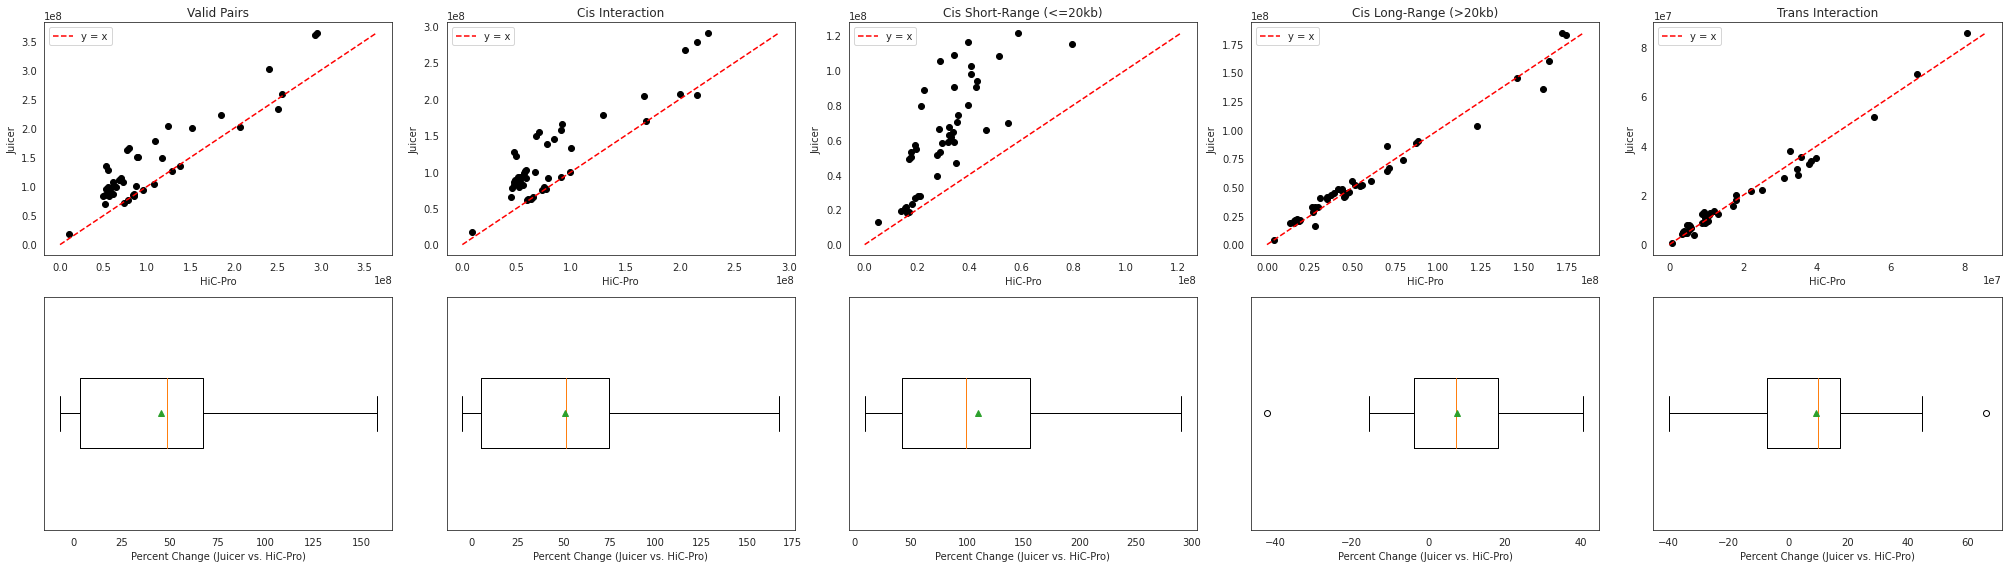

In [888]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(2, 5, figsize=(28, 8))

for i, stat in enumerate(stats):
    axes[0, i].scatter(dat[stat + " HiC-Pro"], dat[stat + " Juicer"], color='k')
    axes[0, i].plot([0, max(dat[stat + " HiC-Pro"].max(), dat[stat + " Juicer"].max())], 
                 [0, max(dat[stat + " HiC-Pro"].max(), dat[stat + " Juicer"].max())], 
                 color='red', linestyle='--', label='y = x')
    axes[0, i].set_xlabel('HiC-Pro')
    axes[0, i].set_ylabel('Juicer')
    axes[0, i].set_title(stat)
    axes[0, i].legend()
    
for i, stat in enumerate(stats):
    axes[1, i].boxplot(dat[stat + " Percent Change Juicer"], labels = [""], showmeans=True, vert = False, widths = .3)
    axes[1, i].set_xlabel("Percent Change (Juicer vs. HiC-Pro)")
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
#fig.savefig("results/revisions/figures/hicpro_juicer_comparison_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()

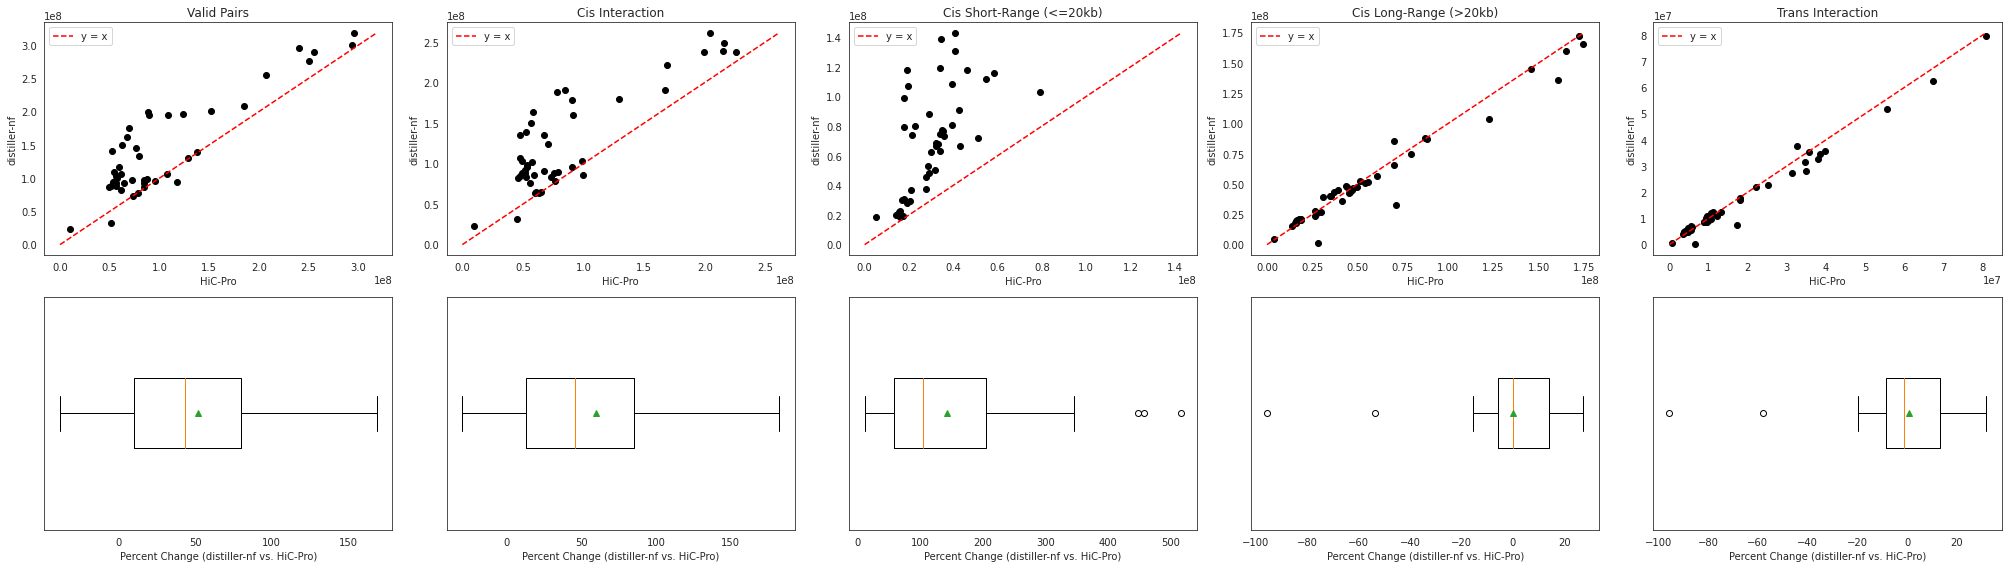

In [890]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(2, 5, figsize=(28, 8))

for i, stat in enumerate(stats):
    axes[0, i].scatter(dat[stat + " HiC-Pro"], dat[stat + " distiller-nf"], color='k')
    axes[0, i].plot([0, max(dat[stat + " HiC-Pro"].max(), dat[stat + " distiller-nf"].max())], 
                 [0, max(dat[stat + " HiC-Pro"].max(), dat[stat + " distiller-nf"].max())], 
                 color='red', linestyle='--', label='y = x')
    axes[0, i].set_xlabel('HiC-Pro')
    axes[0, i].set_ylabel('distiller-nf')
    axes[0, i].set_title(stat)
    axes[0, i].legend()
    
for i, stat in enumerate(stats):
    axes[1, i].boxplot(dat[stat + " Percent Change distiller-nf"], labels = [""], showmeans=True, vert = False, widths = .3)
    axes[1, i].set_xlabel("Percent Change (distiller-nf vs. HiC-Pro)")
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_UU+UR.png_09.04.24.png", dpi = 1000)

# Show the plot
plt.show()

In [891]:
dat.describe()

,Total Reads,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf,Valid Pairs Percent Change Juicer,Cis Interaction Percent Change Juicer,Cis Short-Range (<=20kb) Percent Change Juicer,Cis Long-Range (>20kb) Percent Change Juicer,Trans Interaction Percent Change Juicer,Valid Pairs Percent Change distiller-nf,Cis Interaction Percent Change distiller-nf,Cis Short-Range (<=20kb) Percent Change distiller-nf,Cis Long-Range (>20kb) Percent Change distiller-nf,Trans Interaction Percent Change distiller-nf
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,5.295720e+08,1.032877e+08,8.575193e+07,3.060775e+07,5.514418e+07,1.753573e+07,1.371430e+08,1.195260e+08,6.323554e+07,5.629049e+07,1.761702e+07,1.407834e+08,1.241463e+08,7.085148e+07,5.329483e+07,1.663713e+07,45.669940,50.980080,109.733231,7.509438,9.243286,51.991198,59.524736,142.249209,0.296882,0.608405
std,4.760222e+08,6.926298e+07,5.367680e+07,1.381061e+07,4.551288e+07,1.801339e+07,7.424547e+07,6.028687e+07,3.027014e+07,4.389932e+07,1.755684e+07,7.297397e+07,6.100718e+07,3.571386e+07,4.307459e+07,1.690917e+07,39.671437,41.650364,72.266410,15.515247,20.658964,51.365608,56.177994,121.167020,20.392675,21.808898
min,7.680341e+07,1.006006e+07,9.287138e+06,5.139456e+06,4.147682e+06,7.729240e+05,1.829606e+07,1.753856e+07,1.315247e+07,4.386085e+06,7.574990e+05,2.383878e+07,2.307447e+07,1.833569e+07,1.228875e+06,2.999070e+05,-6.965122,-4.889488,8.944497,-42.196353,-39.786727,-38.436428,-29.973661,11.626129,-95.651467,-95.512764
25%,2.514955e+08,5.702495e+07,5.255290e+07,1.926283e+07,2.653300e+07,4.809090e+06,8.780683e+07,8.168580e+07,4.682710e+07,2.232608e+07,5.701619e+06,9.321258e+07,8.431688e+07,3.733401e+07,2.141018e+07,5.300155e+06,3.504277,5.062677,41.828020,-3.836018,-7.141273,10.023892,12.701743,58.257026,-5.821005,-8.653584
50%,3.587311e+08,7.813779e+07,6.487036e+07,2.973405e+07,4.357073e+07,1.007736e+07,1.068271e+08,9.352404e+07,6.172815e+07,4.514159e+07,1.219666e+07,1.062424e+08,9.813270e+07,7.208290e+07,4.309679e+07,9.625550e+06,48.803624,51.555172,99.373980,7.236600,10.056794,43.550991,45.411759,104.794571,0.155519,-1.114210
75%,6.221514e+08,1.172206e+08,9.062505e+07,3.560487e+07,6.984843e+07,2.518514e+07,1.625514e+08,1.491841e+08,8.871633e+07,6.442451e+07,2.226064e+07,1.951389e+08,1.629430e+08,9.908985e+07,5.623406e+07,2.272337e+07,67.816743,74.990488,155.911735,18.361649,17.287003,79.757166,85.379565,204.460485,13.932169,13.368816
max,2.133899e+09,2.959289e+08,2.259038e+08,7.917164e+07,1.746773e+08,8.077504e+07,3.638764e+08,2.907327e+08,1.211237e+08,1.846234e+08,8.582800e+07,3.182751e+08,2.609442e+08,1.428965e+08,1.724323e+08,7.958074e+07,158.091369,167.364460,290.265302,40.601486,66.075973,168.660513,182.474415,516.172288,27.537676,31.587369


## Alignment Analysis - Short Pairs Removed (<=1kb)

In [893]:
sheets = glob.glob("results/revisions/alignment_comparison/short_pairs_analysis/*.b*")
data = []
for sheet in sheets:
    sample_data = []
    sample_name = sheet.strip().split("/")[4]
    sample_data.append(sample_name)
    with open(sheet + "/stats.txt") as s:
        for line in s:
            if ":" in line and "All" not in line and "distiller" not in line:
                stat = line.strip().split(": ")[1]
                sample_data.append(int(stat))
    with open(sheet + "/stats_distiller_UU_UR.txt") as s:
        for line in s:
            if ":" in line and "All" not in line:
                stat = line.strip().split(": ")[1]
                sample_data.append(int(stat))
    data.append(sample_data)
df = pd.DataFrame(data).sort_values(by=0).reset_index(drop=True)
df.columns = ["std_sample_name", "Valid Pairs HiC-Pro", "Cis Interaction HiC-Pro", "Cis Short-Range (<=20kb) HiC-Pro", "Cis Long-Range (>20kb) HiC-Pro", "Trans Interaction HiC-Pro", "Valid Pairs Juicer", "Cis Interaction Juicer", "Cis Short-Range (<=20kb) Juicer", "Cis Long-Range (>20kb) Juicer", "Trans Interaction Juicer", "Valid Pairs distiller-nf", "Cis Interaction distiller-nf", "Cis Short-Range (<=20kb) distiller-nf", "Cis Long-Range (>20kb) distiller-nf", "Trans Interaction distiller-nf"]
df

,std_sample_name,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,159184037,141148854,53044440,88104414,18035183,162567443,144320612,54301886,90018726,18246831,159289171,141654057,54085648,87568409,17635114
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,14967275,10189261,2296541,7892720,4778014,13703302,9450726,2146269,7304457,4252576,13956144,9627982,2194778,7433204,4328162
2,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,11778625,8307328,1789973,6517355,3471297,10741901,7701962,1676121,6025841,3039939,11019321,7902621,1725169,6177452,3116700
3,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,12960075,8956098,1724037,7232061,4003977,11697439,8244701,1600260,6644441,3452738,12011715,8467703,1648624,6819079,3544012
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,11176891,7756804,1535493,6221311,3420087,9986426,7062355,1411410,5650945,2924071,10267229,7262035,1455959,5806076,3005194
5,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,16474081,11576536,2682232,8894304,4897545,15249659,10837147,2536105,8301042,4412512,15490650,11011223,2584047,8427176,4479427
6,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,10733393,7289807,1214209,6075598,3443586,9749462,6768842,1136210,5632632,2980620,10010252,6950212,1170382,5779830,3060040
7,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,17062470,12091968,2464522,9627446,4970502,15482928,11132299,2290476,8841823,4350629,15850740,11399434,2353188,9046246,4451306
8,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,19770306,13680231,2628484,11051747,6090075,18057768,12667973,2457578,10210395,5389795,18338578,12866273,2502810,10363463,5472305
9,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,11548987,8121276,1770780,6350496,3427711,10421369,7453281,1640348,5812933,2968088,10660727,7625846,1684368,5941478,3034881


In [894]:
df["parse_sample_name"] = df.apply(lambda x : get_parse_sample_name(x[0]), axis = 1)

In [895]:
df = df.groupby(['parse_sample_name'], as_index=False).agg({
    'std_sample_name' : list,
    'Valid Pairs HiC-Pro': 'sum',
    'Cis Interaction HiC-Pro': 'sum',
    'Cis Short-Range (<=20kb) HiC-Pro': 'sum',
    'Cis Long-Range (>20kb) HiC-Pro': 'sum',
    'Trans Interaction HiC-Pro': 'sum',
    'Valid Pairs Juicer': 'sum',
    'Cis Interaction Juicer': 'sum',
    'Cis Short-Range (<=20kb) Juicer': 'sum',
    'Cis Long-Range (>20kb) Juicer': 'sum',
    'Trans Interaction Juicer': 'sum',
    'Valid Pairs distiller-nf': 'sum',
    'Cis Interaction distiller-nf': 'sum',
    'Cis Short-Range (<=20kb) distiller-nf': 'sum',
    'Cis Long-Range (>20kb) distiller-nf': 'sum',
    'Trans Interaction distiller-nf': 'sum'
})
df["std_sample_name"] = df.apply(lambda x : x[0] + ".b1" if len(x[1]) == 1 else x[0] + ".biorep_merged", axis = 1)
df = df.drop(columns="parse_sample_name")

In [896]:
df

,std_sample_name,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,159184037,141148854,53044440,88104414,18035183,162567443,144320612,54301886,90018726,18246831,159289171,141654057,54085648,87568409,17635114
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,126472103,87969309,18106271,69863038,38502794,115090254,81319286,16894777,64424509,33770968,117605356,83113329,17319325,65794004,34492027
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,83259416,58074276,12472573,45601703,25185140,76206136,53945491,11683943,42261548,22260645,77826810,55103441,11971498,43131943,22723369
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,71984655,61180175,17609443,43570732,10804480,79813681,67601225,19304526,48296699,12212456,80373807,68124896,19653871,48471025,12248911
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,6943052,6170128,2022446,4147682,772924,7227076,6469577,2083492,4386085,757499,7362475,6598163,2176615,4421548,764312
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,66241754,61448966,17462486,43986480,4792788,70337787,65441059,18423359,47017700,4896728,71103478,66175455,18861040,47314415,4928023
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,48637635,41954077,13694545,28259532,6683558,28345437,24321048,7986008,16335040,4024389,2150850,1850943,622068,1228875,299907
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,76211421,62943995,15221027,47722968,13267426,73620229,61124226,14788638,46335588,12496003,73684794,61184218,14831822,46352396,12500576
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,71041209,60963846,14021544,46942302,10077363,68060733,58703022,13561435,45141587,9357711,68137035,58774364,13609435,45164929,9362671
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,80965901,70428487,14906188,55522299,10537414,75704563,66076514,14022120,52054394,9628049,75756379,66130829,14071798,52059031,9625550


In [897]:
df["Valid Pairs Percent Change Juicer"] = df.apply(lambda x : (float((x["Valid Pairs Juicer"] - x["Valid Pairs HiC-Pro"])) / float(x["Valid Pairs HiC-Pro"])) * 100, axis = 1)
df["Cis Interaction Percent Change Juicer"] = df.apply(lambda x : (float((x["Cis Interaction Juicer"] - x["Cis Interaction HiC-Pro"])) / float(x["Cis Interaction HiC-Pro"])) * 100, axis = 1)
df["Cis Short-Range (<=20kb) Percent Change Juicer"] = df.apply(lambda x : (float((x["Cis Short-Range (<=20kb) Juicer"] - x["Cis Short-Range (<=20kb) HiC-Pro"])) / float(x["Cis Short-Range (<=20kb) HiC-Pro"])) * 100, axis = 1)
df["Cis Long-Range (>20kb) Percent Change Juicer"] = df.apply(lambda x : (float((x["Cis Long-Range (>20kb) Juicer"] - x["Cis Long-Range (>20kb) HiC-Pro"])) / float(x["Cis Long-Range (>20kb) HiC-Pro"])) * 100, axis = 1)
df["Trans Interaction Percent Change Juicer"] = df.apply(lambda x : (float((x["Trans Interaction Juicer"] - x["Trans Interaction HiC-Pro"])) / float(x["Trans Interaction HiC-Pro"])) * 100, axis = 1)

df["Valid Pairs Percent Change distiller-nf"] = df.apply(lambda x : (float((x["Valid Pairs distiller-nf"] - x["Valid Pairs HiC-Pro"])) / float(x["Valid Pairs HiC-Pro"])) * 100, axis = 1)
df["Cis Interaction Percent Change distiller-nf"] = df.apply(lambda x : (float((x["Cis Interaction distiller-nf"] - x["Cis Interaction HiC-Pro"])) / float(x["Cis Interaction HiC-Pro"])) * 100, axis = 1)
df["Cis Short-Range (<=20kb) Percent Change distiller-nf"] = df.apply(lambda x : (float((x["Cis Short-Range (<=20kb) distiller-nf"] - x["Cis Short-Range (<=20kb) HiC-Pro"])) / float(x["Cis Short-Range (<=20kb) HiC-Pro"])) * 100, axis = 1)
df["Cis Long-Range (>20kb) Percent Change distiller-nf"] = df.apply(lambda x : (float((x["Cis Long-Range (>20kb) distiller-nf"] - x["Cis Long-Range (>20kb) HiC-Pro"])) / float(x["Cis Long-Range (>20kb) HiC-Pro"])) * 100, axis = 1)
df["Trans Interaction Percent Change distiller-nf"] = df.apply(lambda x : (float((x["Trans Interaction distiller-nf"] - x["Trans Interaction HiC-Pro"])) / float(x["Trans Interaction HiC-Pro"])) * 100, axis = 1)

In [898]:
df

,std_sample_name,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf,Valid Pairs Percent Change Juicer,Cis Interaction Percent Change Juicer,Cis Short-Range (<=20kb) Percent Change Juicer,Cis Long-Range (>20kb) Percent Change Juicer,Trans Interaction Percent Change Juicer,Valid Pairs Percent Change distiller-nf,Cis Interaction Percent Change distiller-nf,Cis Short-Range (<=20kb) Percent Change distiller-nf,Cis Long-Range (>20kb) Percent Change distiller-nf,Trans Interaction Percent Change distiller-nf
0,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,159184037,141148854,53044440,88104414,18035183,162567443,144320612,54301886,90018726,18246831,159289171,141654057,54085648,87568409,17635114,2.125468,2.247101,2.370552,2.172776,1.173528,0.066046,0.357922,1.962898,-0.608375,-2.218270
1,CD4_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,126472103,87969309,18106271,69863038,38502794,115090254,81319286,16894777,64424509,33770968,117605356,83113329,17319325,65794004,34492027,-8.999494,-7.559481,-6.691019,-7.784558,-12.289565,-7.010832,-5.520084,-4.346262,-5.824302,-10.416821
2,CD8_Naive_All-Donors.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,83259416,58074276,12472573,45601703,25185140,76206136,53945491,11683943,42261548,22260645,77826810,55103441,11971498,43131943,22723369,-8.471450,-7.109490,-6.322913,-7.324628,-11.611986,-6.524915,-5.115578,-4.017415,-5.415938,-9.774697
3,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,71984655,61180175,17609443,43570732,10804480,79813681,67601225,19304526,48296699,12212456,80373807,68124896,19653871,48471025,12248911,10.875965,10.495312,9.625989,10.846655,13.031409,11.654084,11.351260,11.609839,11.246754,13.368816
4,H9.GSE105028.Homo_Sapiens.CTCF.b1,6943052,6170128,2022446,4147682,772924,7227076,6469577,2083492,4386085,757499,7362475,6598163,2176615,4421548,764312,4.090766,4.853206,3.018424,5.747861,-1.995668,6.040902,6.937214,7.622898,6.602869,-1.114210
5,H9.GSE105028.Homo_Sapiens.Rad21.b1,66241754,61448966,17462486,43986480,4792788,70337787,65441059,18423359,47017700,4896728,71103478,66175455,18861040,47314415,4928023,6.183461,6.496599,5.502498,6.891254,2.168675,7.339365,7.691731,8.008905,7.565813,2.821635
6,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,48637635,41954077,13694545,28259532,6683558,28345437,24321048,7986008,16335040,4024389,2150850,1850943,622068,1228875,299907,-41.721186,-42.029357,-41.684751,-42.196353,-39.786727,-95.577807,-95.588169,-95.457549,-95.651467,-95.512764
7,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1,76211421,62943995,15221027,47722968,13267426,73620229,61124226,14788638,46335588,12496003,73684794,61184218,14831822,46352396,12500576,-3.400005,-2.891092,-2.840735,-2.907154,-5.814413,-3.315287,-2.795782,-2.557022,-2.871934,-5.779946
8,JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1,71041209,60963846,14021544,46942302,10077363,68060733,58703022,13561435,45141587,9357711,68137035,58774364,13609435,45164929,9362671,-4.195418,-3.708467,-3.281443,-3.836018,-7.141273,-4.088013,-3.591443,-2.939113,-3.786293,-7.092054
9,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,80965901,70428487,14906188,55522299,10537414,75704563,66076514,14022120,52054394,9628049,75756379,66130829,14071798,52059031,9625550,-6.498215,-6.179279,-5.930879,-6.245968,-8.629869,-6.434217,-6.102159,-5.597608,-6.237616,-8.653584


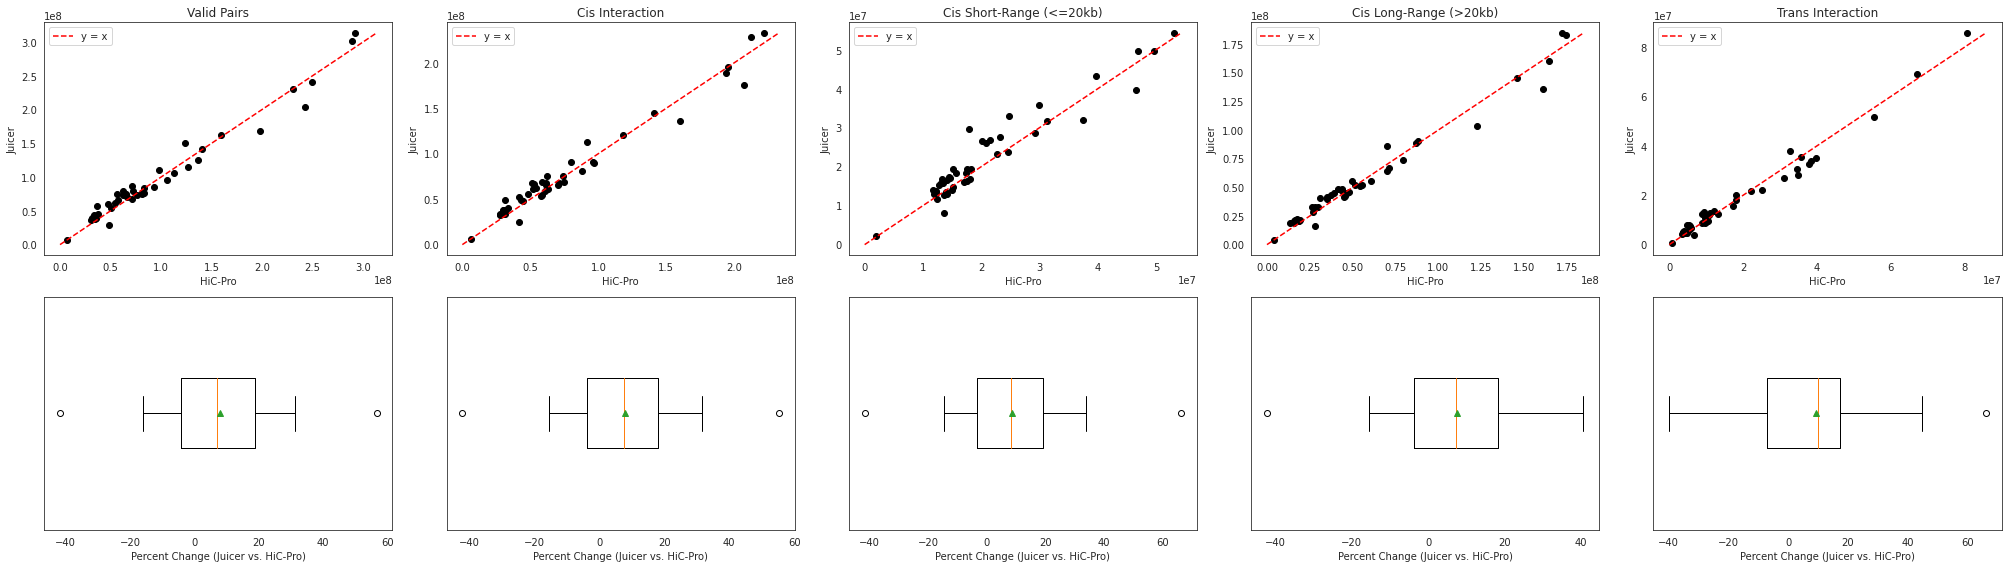

In [899]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(2, 5, figsize=(28, 8))

for i, stat in enumerate(stats):
    axes[0, i].scatter(df[stat + " HiC-Pro"], df[stat + " Juicer"], color='k')
    axes[0, i].plot([0, max(df[stat + " HiC-Pro"].max(), df[stat + " Juicer"].max())], 
                 [0, max(df[stat + " HiC-Pro"].max(), df[stat + " Juicer"].max())], 
                 color='red', linestyle='--', label='y = x')
    axes[0, i].set_xlabel('HiC-Pro')
    axes[0, i].set_ylabel('Juicer')
    axes[0, i].set_title(stat)
    axes[0, i].legend()
    
for i, stat in enumerate(stats):
    axes[1, i].boxplot(df[stat + " Percent Change Juicer"], labels = [""], showmeans=True, vert = False, widths = .3)
    axes[1, i].set_xlabel("Percent Change (Juicer vs. HiC-Pro)")
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
#fig.savefig("results/revisions/figures/hicpro_juicer_comparison_cisdistfilt_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()

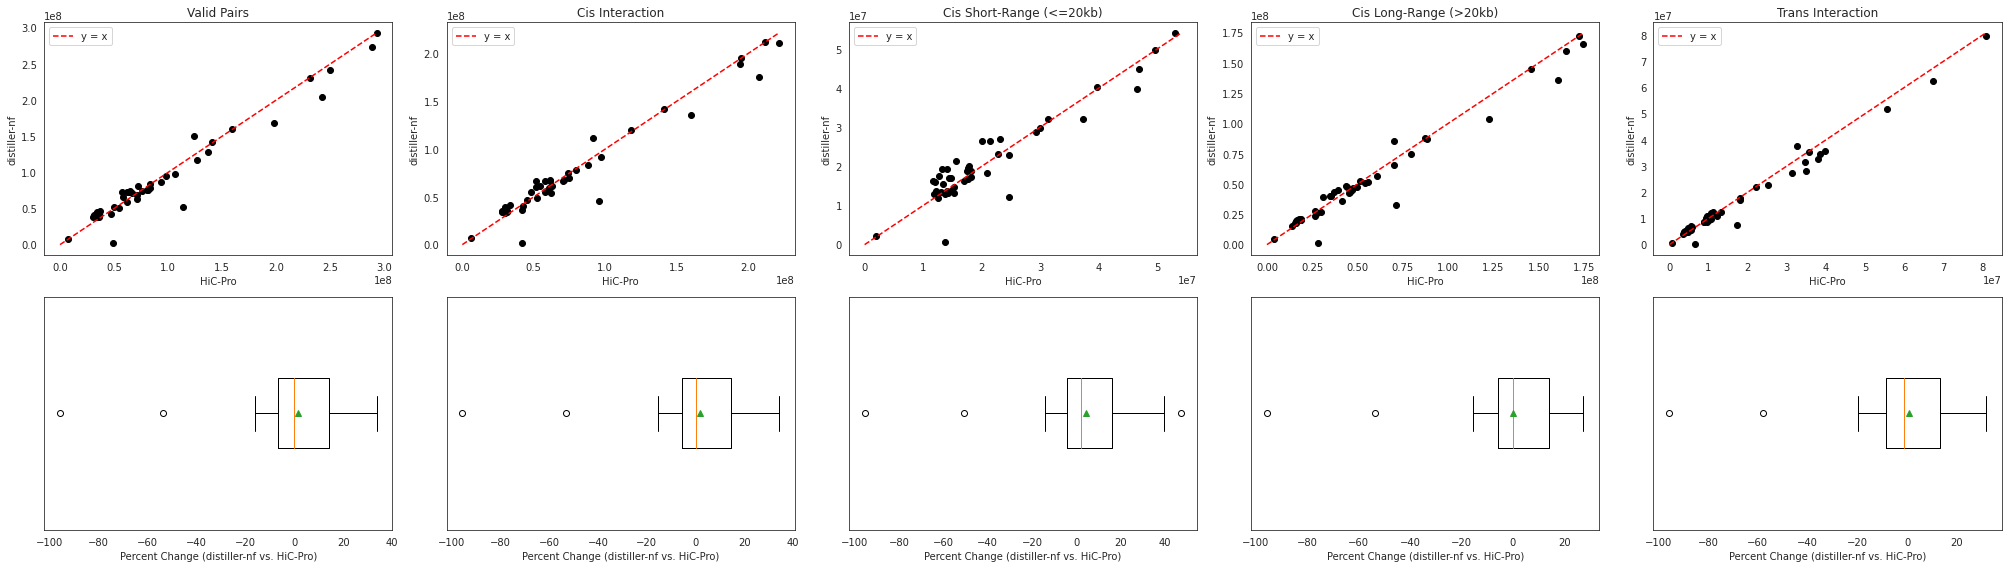

In [901]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(2, 5, figsize=(28, 8))

for i, stat in enumerate(stats):
    axes[0, i].scatter(df[stat + " HiC-Pro"], df[stat + " distiller-nf"], color='k')
    axes[0, i].plot([0, max(df[stat + " HiC-Pro"].max(), df[stat + " distiller-nf"].max())], 
                 [0, max(df[stat + " HiC-Pro"].max(), df[stat + " distiller-nf"].max())], 
                 color='red', linestyle='--', label='y = x')
    axes[0, i].set_xlabel('HiC-Pro')
    axes[0, i].set_ylabel('distiller-nf')
    axes[0, i].set_title(stat)
    axes[0, i].legend()
    
for i, stat in enumerate(stats):
    axes[1, i].boxplot(df[stat + " Percent Change distiller-nf"], labels = [""], showmeans=True, vert = False, widths = .3)
    axes[1, i].set_xlabel("Percent Change (distiller-nf vs. HiC-Pro)")
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_cisdistfilt_UU+UR_09.04.24.png", dpi = 1000)

# Show the plot
plt.show()

#### Investigation

In [853]:
hicpro_samplesheet = "results/samplesheets/hicpro/revisions.top_45.hicpro.samplesheet.all.without_header.tsv"
hicpro_data = pd.read_csv(hicpro_samplesheet, sep = "\t", header = None)
hicpro_data = hicpro_data[[0, 2, 3]]
hicpro_data.columns = ["std_sample_name", "Pulldown", "RE"]

readlength_samplesheet = "results/samplesheets/post-hicpro/2024.5.7.16.56.readlength.samplesheet.master.without_header.tsv"
readlength_data = pd.read_csv(readlength_samplesheet, sep = "\t", header = None)
readlength_data[0] = readlength_data.apply(lambda x : x[0][:-3] if "biorep_merged" not in x[0] else x[0][:-14], axis = 1)
readlength_data = readlength_data.drop_duplicates(subset = [0]).sort_values(by=0).reset_index(drop=True)
readlength_data.columns = ["parse_sample_name", "R1 Length", "R2 Length"]

In [854]:
dis = df.sort_values(by="Cis Short-Range (<=20kb) Percent Change distiller-nf")
dis["parse_sample_name"] = dis.apply(lambda x : x[0][:-3] if "biorep_merged" not in x[0] else x[0][:-14], axis = 1)

dis = dis.merge(dat[["std_sample_name", "Total Reads"]], on = "std_sample_name")
dis = dis.merge(hicpro_data, on = "std_sample_name")
dis = dis.merge(readlength_data, on = "parse_sample_name")
dis = dis.drop(columns = "parse_sample_name")

In [855]:
dis

,std_sample_name,Valid Pairs HiC-Pro,Cis Interaction HiC-Pro,Cis Short-Range (<=20kb) HiC-Pro,Cis Long-Range (>20kb) HiC-Pro,Trans Interaction HiC-Pro,Valid Pairs Juicer,Cis Interaction Juicer,Cis Short-Range (<=20kb) Juicer,Cis Long-Range (>20kb) Juicer,Trans Interaction Juicer,Valid Pairs distiller-nf,Cis Interaction distiller-nf,Cis Short-Range (<=20kb) distiller-nf,Cis Long-Range (>20kb) distiller-nf,Trans Interaction distiller-nf,Valid Pairs Percent Change Juicer,Cis Interaction Percent Change Juicer,Cis Short-Range (<=20kb) Percent Change Juicer,Cis Long-Range (>20kb) Percent Change Juicer,Trans Interaction Percent Change Juicer,Valid Pairs Percent Change distiller-nf,Cis Interaction Percent Change distiller-nf,Cis Short-Range (<=20kb) Percent Change distiller-nf,Cis Long-Range (>20kb) Percent Change distiller-nf,Trans Interaction Percent Change distiller-nf,Total Reads,Pulldown,RE,R1 Length,R2 Length
0,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b1,48637635,41954077,13694545,28259532,6683558,28345437,24321048,7986008,16335040,4024389,33734,25017,8878,16139,8717,-41.721186,-42.029357,-41.684751,-42.196353,-39.786727,-99.930642,-99.940371,-99.935171,-99.942890,-99.869575,188721765,CTCF,MboI,150,150
1,Wei-22RV1.GSE200165.Homo_Sapiens.CTCF.biorep_merged,113266450,95899974,24661816,71238158,17366476,106731655,90869576,23880530,66989046,15862079,13360336,11659442,3188694,8470748,1700894,-5.769400,-5.245463,-3.167999,-5.964657,-8.662650,-88.204507,-87.842080,-87.070320,-88.109255,-90.205877,375335640,CTCF,MboI,150,150
2,Wei-22RV1-Control.GSE200165.Homo_Sapiens.CTCF.biorep_merged,47218681,41752472,15219471,26533001,5466209,59935325,52030136,19513866,32516270,7905189,11593930,10077746,3588608,6489138,1516184,26.931383,24.615702,28.216454,22.550291,44.619223,-75.446307,-75.863115,-76.420941,-75.543143,-72.262605,344429396,CTCF,MboI,150,150
3,Wei-22RV1-Myc.GSE200165.Homo_Sapiens.CTCF.biorep_merged,71085445,62185549,20854331,41331218,8899896,87254286,74961447,26041136,48920311,12292839,18909110,16328945,5498745,10830200,2580165,22.745642,20.544802,24.871596,18.361649,38.123401,-73.399463,-73.741576,-73.632599,-73.796562,-71.009043,437453186,CTCF,MboI,150,150
4,Wei-22RV1-Myc.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged,61971507,52608524,24739488,27869036,9362983,79525056,66157774,33115272,33042502,13367282,18761964,15481246,6975370,8505876,3280718,28.325193,25.754857,33.855931,18.563491,42.767342,-69.724854,-70.572742,-71.804712,-69.479117,-64.960761,410848106,H3K27ac,MboI,150,150
5,Wei-22RV1-Control.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged,36343669,31534579,17889581,13644998,4809090,56940056,48953313,29768243,19185070,7986743,14515584,12232897,6552822,5680075,2282687,56.671183,55.236932,66.399889,40.601486,66.075973,-60.060213,-61.207990,-63.370735,-58.372475,-52.533910,358731076,H3K27ac,MboI,150,150
6,LNCaP.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged,97958959,79818714,29977798,49840916,18140245,111087837,91123265,35735273,55387992,19964572,37670544,31168143,12221945,18946198,6502401,13.402427,14.162783,19.205797,11.129563,10.056794,-61.544565,-60.951334,-59.230011,-61.986658,-64.154834,1060705471,H3K27ac,MboI,132,132
7,U3073-GBM.GSE217349.Homo_Sapiens.H3K4me3.b1,50328559,44926851,18196495,26730356,5401708,53912619,47835742,19406968,28428774,6076877,20251299,17934815,7467231,10467584,2316484,7.121324,6.474727,6.652232,6.353892,12.499176,-59.761814,-60.079964,-58.963355,-60.840088,-57.115712,152047169,H3K4me3,Arima,150,150
8,hCM-Ctrl.GSE165303.Homo_Sapiens.H3K27ac.b1,64091589,58221685,23156597,35065088,5869904,75712056,68835118,27620011,41215107,6876938,27494589,25105441,10330798,14774643,2389148,18.131033,18.229347,19.274913,17.538867,17.155885,-57.101096,-56.879570,-55.387236,-57.865091,-59.298346,185903802,H3K27ac,Arima,150,150
9,LHSAR.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged,54914956,42789016,13087658,29701358,12125940,62277338,48828198,15814079,33014119,13449140,20794959,16634487,5961559,10672928,4160472,13.406880,14.1

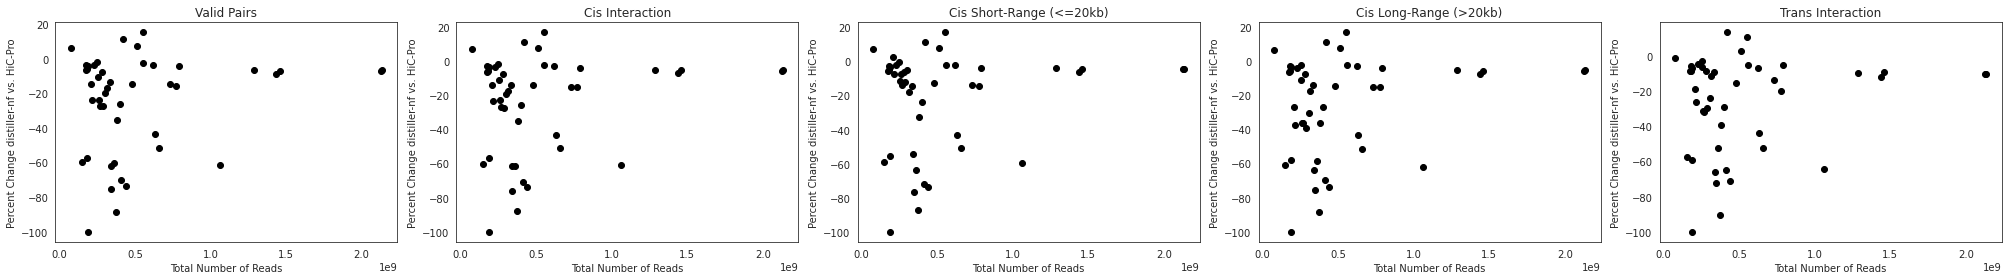

In [860]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(1, 5, figsize=(28, 4))

for i, stat in enumerate(stats):
    axes[i].scatter(dis["Total Reads"], dis[stat + " Percent Change distiller-nf"], color='k')
    axes[i].set_xlabel("Total Number of Reads")
    axes[i].set_ylabel('Percent Change distiller-nf vs. HiC-Pro')
    axes[i].set_title(stat)

# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_numreads_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()

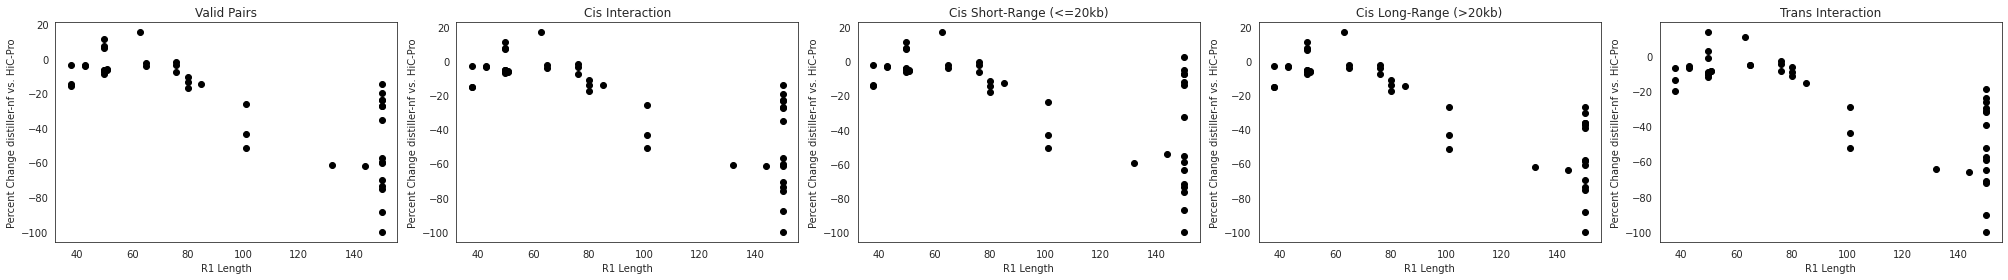

In [861]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(1, 5, figsize=(28, 4))

for i, stat in enumerate(stats):
    axes[i].scatter(dis["R1 Length"], dis[stat + " Percent Change distiller-nf"], color='k')
    axes[i].set_xlabel("R1 Length")
    axes[i].set_ylabel('Percent Change distiller-nf vs. HiC-Pro')
    axes[i].set_title(stat)
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_readlength_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()

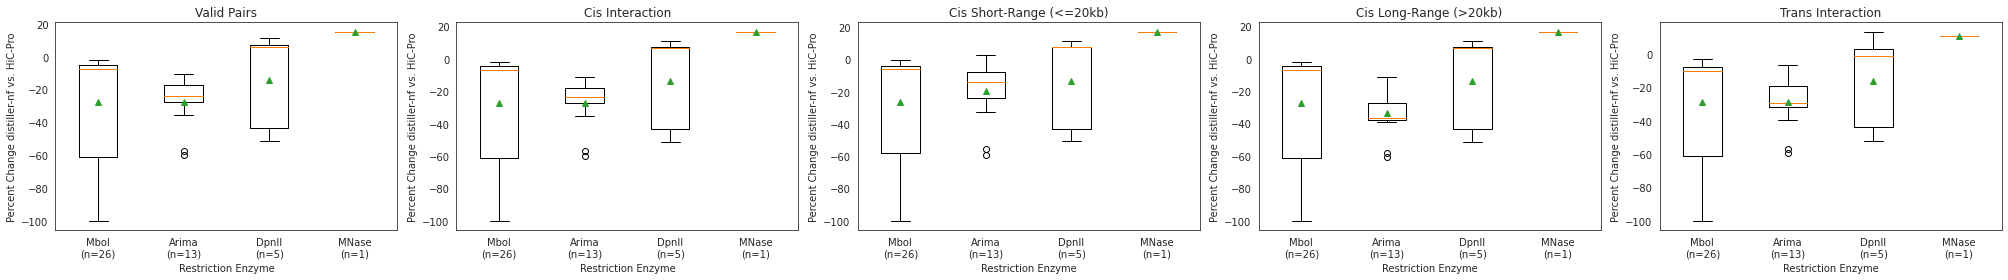

In [862]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(1, 5, figsize=(28, 4))

for i, stat in enumerate(stats):
    grouped_data = [dis[stat + " Percent Change distiller-nf"][dis["RE"] == group] for group in dis["RE"].unique()]
    unique_groups = dis["RE"].unique()
    group_counts = [len(dis[dis["RE"] == group]) for group in unique_groups]
    labels_with_counts = [f"{group}\n(n={count})" for group, count in zip(unique_groups, group_counts)]
    axes[i].boxplot(grouped_data, labels=labels_with_counts, showmeans = True)
    axes[i].set_xlabel("Restriction Enzyme")
    axes[i].set_ylabel('Percent Change distiller-nf vs. HiC-Pro')
    axes[i].set_title(stat)
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_re_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()

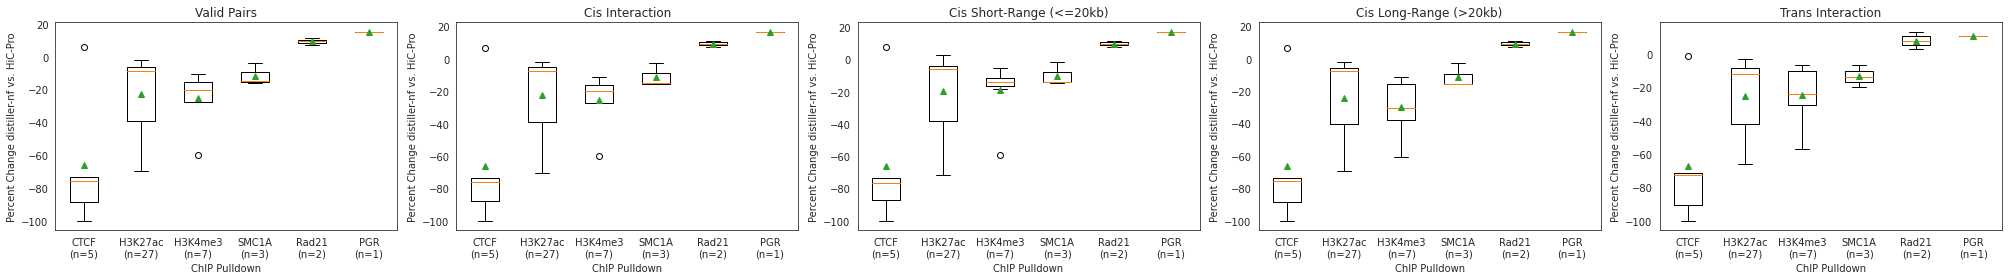

In [863]:
sns.set_style("white")
stats = ["Valid Pairs", "Cis Interaction", "Cis Short-Range (<=20kb)", "Cis Long-Range (>20kb)", "Trans Interaction"]
fig, axes = plt.subplots(1, 5, figsize=(28, 4))

for i, stat in enumerate(stats):
    grouped_data = [dis[stat + " Percent Change distiller-nf"][dis["Pulldown"] == group] for group in dis["Pulldown"].unique()]
    unique_groups = dis["Pulldown"].unique()
    group_counts = [len(dis[dis["Pulldown"] == group]) for group in unique_groups]
    labels_with_counts = [f"{group}\n(n={count})" for group, count in zip(unique_groups, group_counts)]
    axes[i].boxplot(grouped_data, labels=labels_with_counts, showmeans = True)
    axes[i].set_xlabel("ChIP Pulldown")
    axes[i].set_ylabel('Percent Change distiller-nf vs. HiC-Pro')
    axes[i].set_title(stat)
    
# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# save figure
fig.savefig("results/revisions/figures/hicpro_distiller-nf_comparison_pulldown_08.28.24.png", dpi = 1000)

# Show the plot
plt.show()